# Effect of detection (in)efficiency on kinematic distributions
We are goint to take into account:
* Polar angle cut
* Transverse momentum cut
* Track reconstruction probability

(Part of the Multibody decays analyis Course, Novosibirsk State University, Spring 2019)

In [1]:
import sys
sys.path.append("../lib/")

from DalitzPhaseSpace import DalitzPhaseSpace
from PhspGen import PhspGen

Generate a phase space sample for $D^0\to K_S^0 \pi^+\pi^-$ decay

In [2]:
phsp = DalitzPhaseSpace(0.511, 0.135, 0.135, 1.865)
gen = PhspGen(phsp)

In [3]:
%%time
sample = gen('AB', 'BC', 10**6)

CPU times: user 1.93 s, sys: 272 ms, total: 2.2 s
Wall time: 2.2 s


This sample is full: it contains momentum four-vectors of all final-state-particles in the $D^0$ rest frame. alpha and beta correspond to random Euler rotation angles

In [4]:
sample.dtype.names

('AB', 'BC', 'AC', 'alpha', 'beta', 'eA', 'eB', 'eC', 'pA', 'pB', 'pC')

In [5]:
sample[0]

(2.06109075, 1.07492454, 0.63978071, 1.02729149, 0.15066595, 0.71432211, 0.76586308, 0.38481481, [0.0387432 , 0.06412273, 0.4934798 ], [ 0.25201802, -0.090024  , -0.7047722 ], [-0.29076122,  0.02590128,  0.2112924 ])

Make a detector with polar acceptance region from $10$ to $170$ degrees, minimum detectable transverse momentum $50$ MeV/c${}^2$ and perfect tracks reconstruction

In [6]:
from Efficiency import Detector

In [13]:
det = Detector(15., 0.05, 1.)

Get the detection mask and calculate integral detection efficiency

In [14]:
import numpy as np

In [15]:
detMask = det.effMask(sample)
float(np.count_nonzero(detMask)) / len(sample)

0.875936

In [16]:
detectedEvents = sample[detMask]

Make some plots

In [17]:
import matplotlib.pyplot as plt
from PlotUtility import plot_ddist, show_phase_space, projections

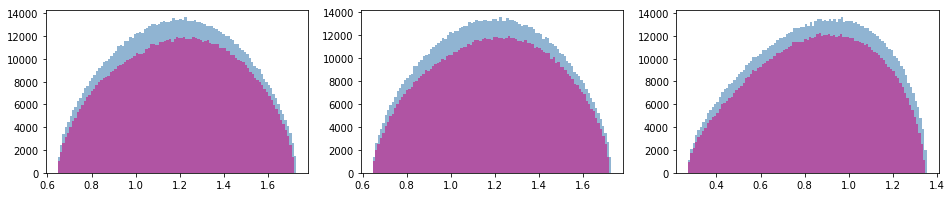

In [18]:
figax = projections(sample)
figax = projections(detectedEvents, 'mediumvioletred', False, 0.6, figax)
plt.show()

/usr/local/lib/python2.7/dist-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


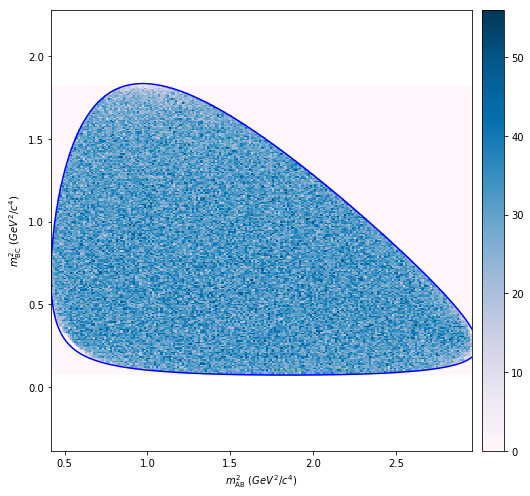

In [20]:
fig = show_phase_space(phsp, 'AB', 'BC', 1)
fig = plot_ddist(detectedEvents['AB'], detectedEvents['BC'], 200, 1)
plt.show()

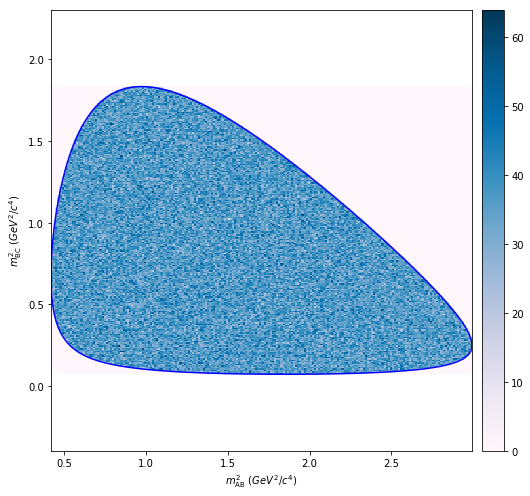

In [21]:
fig = show_phase_space(phsp, 'AB', 'BC', 1)
fig = plot_ddist(sample['AB'], sample['BC'], 200, 1)
plt.show()